In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

In [2]:
data = pd.read_csv("D:\MSIS\FML Lab\Part 1\Dataset\Social_Network_Ads.csv")

In [3]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data.describe(include="all")

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400,400.000000,400.000000,400.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,204,NaN,NaN,NaN
mean,1.569154e+07,NaN,37.655000,69742.500000,0.357500
std,7.165832e+04,NaN,10.482877,34096.960282,0.479864
min,1.556669e+07,NaN,18.000000,15000.000000,0.000000
25%,1.562676e+07,NaN,29.750000,43000.000000,0.000000
50%,1.569434e+07,NaN,37.000000,70000.000000,0.000000
75%,1.575036e+07,NaN,46.000000,88000.000000,1.000000


In [5]:
data.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data1=data

In [8]:
X=data1.iloc[:,[2,3]].values
y=data1.iloc[:,4].values

In [9]:
#Splitting Dataset into Training and Testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


In [10]:
#Scaling values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [11]:
#Implementing RandomForest Model with criterion='entropy' and max_depth=3
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=0)
DT.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [12]:
y_pred = DT.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [13]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [14]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

In [15]:
#Accuracy
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy :",prediction*100,'%')

Accuracy : 94.0 %


In [16]:
#Precision
from sklearn.metrics import precision_score,f1_score,recall_score
prediction=metrics.precision_score(y_test,y_pred)
print("Precision Score :",prediction*100,'%')

Precision Score : 88.23529411764706 %


In [17]:
#Recall
prediction=metrics.recall_score(y_test,y_pred)
print("Recall Score :",prediction*100,'%')

Recall Score : 93.75 %


In [18]:
#F1 Score
prediction=metrics.f1_score(y_test,y_pred)
print("F1 Score :",prediction*100,'%')

F1 Score : 90.9090909090909 %


[Text(0.5, 0.875, 'x[0] <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]'),
 Text(0.25, 0.625, 'x[1] <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]'),
 Text(0.125, 0.375, 'x[0] <= -0.161\nentropy = 0.241\nsamples = 176\nvalue = [169, 7]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 114\nvalue = [114, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.509\nsamples = 62\nvalue = [55, 7]'),
 Text(0.375, 0.375, 'x[1] <= 1.853\nentropy = 0.619\nsamples = 39\nvalue = [6, 33]'),
 Text(0.3125, 0.125, 'entropy = 0.779\nsamples = 26\nvalue = [6, 20]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.75, 0.625, 'x[1] <= -0.814\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]'),
 Text(0.625, 0.375, 'x[1] <= -1.365\nentropy = 0.211\nsamples = 30\nvalue = [1, 29]'),
 Text(0.5625, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(0.875, 0.375, 'x[0] <= 1.423\nentropy = 0.7

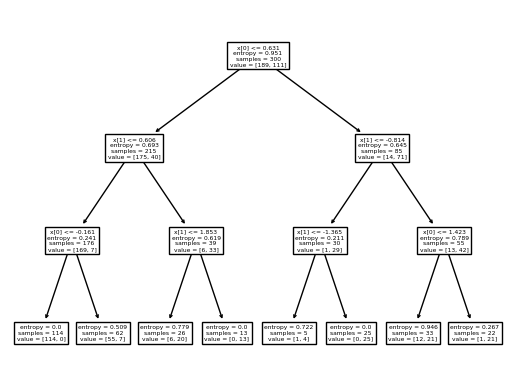

In [19]:
from sklearn import tree
tree.plot_tree(DT)

C:\Users\akash\AppData\Local\Temp\ipykernel_11500\1626325154.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


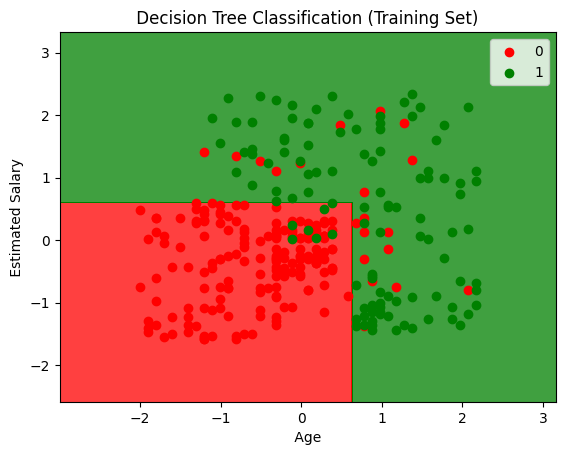

In [20]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,DT.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
 
for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
 
plt.title(" Decision Tree Classification (Training Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_11500\1140307851.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],


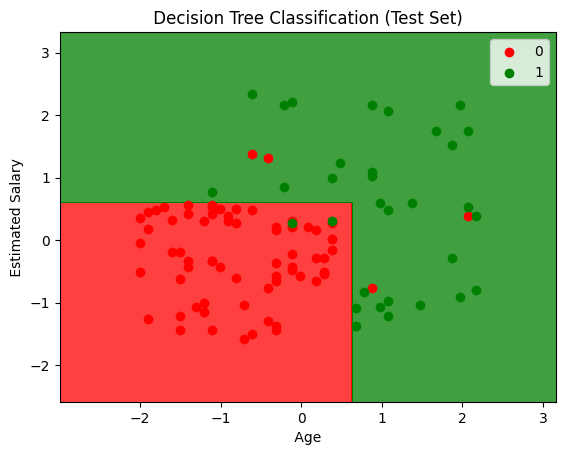

In [21]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                  np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1,X2,DT.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
 
for i,j in enumerate(np.unique(y_set)):
   plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('red','green'))(i),label=j)
 
plt.title(" Decision Tree Classification (Test Set) ")
plt.xlabel(" Age ")
plt.ylabel(" Estimated Salary ")
plt.legend()
plt.show()

In [22]:
#Implementing RandomForest Model with criterion='gini' and max_depth=4
from sklearn.tree import DecisionTreeClassifier
DT2 = DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=0)
DT2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [23]:
y_pred = DT2.predict(X_test)

In [24]:
#Confusion Mtarix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 4, 28]], dtype=int64)

In [25]:
#Accuracy
from sklearn import metrics
prediction=metrics.accuracy_score(y_test,y_pred)
print("Accuracy :",prediction*100,'%')

Accuracy : 93.0 %


In [26]:
#Precision
from sklearn.metrics import precision_score,f1_score,recall_score
prediction=metrics.precision_score(y_test,y_pred)
print("Precision Score :",prediction*100,'%')

Precision Score : 90.32258064516128 %


In [27]:
#Recall
prediction=metrics.recall_score(y_test,y_pred)
print("Recall Score :",prediction*100,'%')

Recall Score : 87.5 %


In [28]:
#F1 Score
prediction=metrics.f1_score(y_test,y_pred)
print("F1 Score :",prediction*100,'%')

F1 Score : 88.88888888888889 %
